# ANÁLISE DA BASE DE DADOS ORIGINAL 
#### Neste notebook são apresentadas informações gerais sobre a base de dados, no caso a utilizada é a Complete_Pokedex_V1.1, bem como uma análise para compreendê-la melhor em sua forma original, ou seja, sem tratamentos aplicados aos dados.

In [1]:
# Verificar os nomes das colunas do dataset
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")
print("Colunas disponíveis:")
print(dataFrame.columns.tolist())

Colunas disponíveis:
['pokedex_number', 'pokemon_name', 'type_1', 'type_2', 'ability_1', 'ability_2', 'ability_3', 'number_pokemon_with_typing', 'primary_color', 'shape', 'height', 'weight', 'bmi', 'hit_points', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats', 'mean', 'standard_deviation', 'capture_rate', 'generation', 'base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100', 'can_evolve', 'evolves_from', 'final_evolution', 'mega_evolution', 'is_default', 'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable', 'legendary', 'mythical', 'genderless', 'female_rate', 'genus', 'egg_group_1', 'egg_group_2', 'egg_cycles', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fighting', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']


## Informações Gerais
#### Visualização dos dados da base de dados

In [2]:
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")
print(dataFrame.head())

   pokedex_number   pokemon_name type_1  type_2  ability_1    ability_2  \
0               1      Bulbasaur  Grass  Poison   Overgrow  Chlorophyll   
1               2        Ivysaur  Grass  Poison   Overgrow  Chlorophyll   
2               3  Mega Venusaur  Grass  Poison  Thick Fat          NaN   
3               3       Venusaur  Grass  Poison   Overgrow  Chlorophyll   
4               3  Venusaur Gmax  Grass  Poison   Overgrow  Chlorophyll   

  ability_3  number_pokemon_with_typing primary_color      shape  ...  \
0       NaN                          15         Green  Quadruped  ...   
1       NaN                          15         Green  Quadruped  ...   
2       NaN                          15         Green  Quadruped  ...   
3       NaN                          15         Green  Quadruped  ...   
4       NaN                          15         Green  Quadruped  ...   

   against_ground  against_flying  against_psychic  against_bug  against_rock  \
0             1.0            

#### Infos básicas

In [3]:
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

print("---------------------------------------")
print("Total de linhas da base de dados:", len(dataFrame))
print("---------------------------------------")
print("Total de colunas:", len(dataFrame.columns)) 
print("---------------------------------------")

---------------------------------------
Total de linhas da base de dados: 1118
---------------------------------------
Total de colunas: 63
---------------------------------------


## Análises da base de dados 

#### Gráfico de regressão

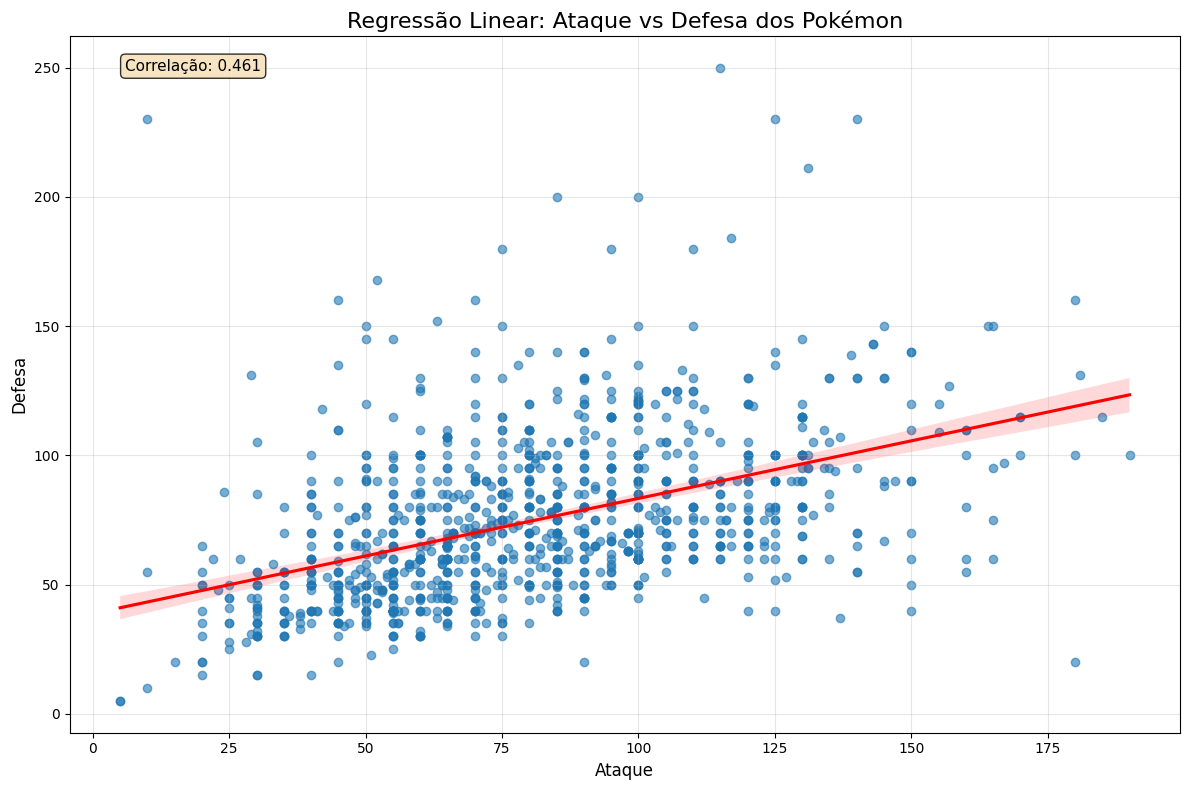

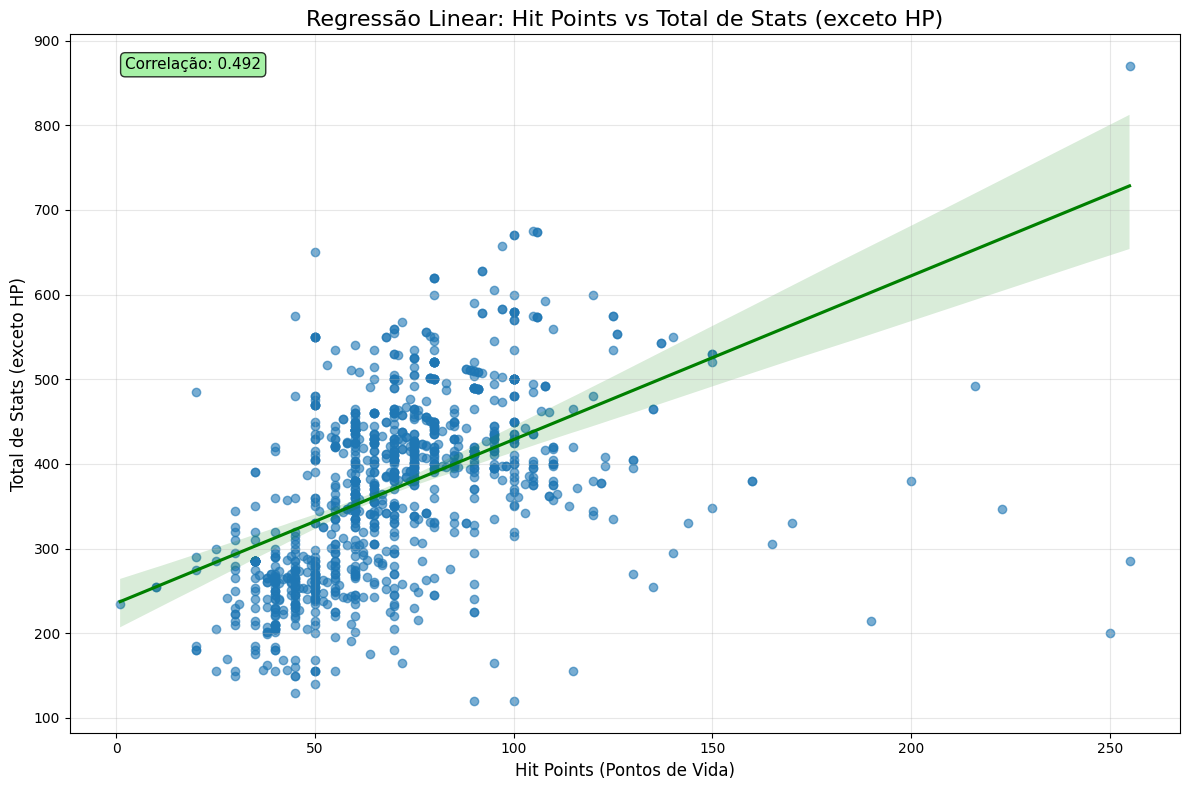

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

plt.figure(figsize=(12, 8))

sns.regplot(data=dataFrame, x='attack', y='defense', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Regressão Linear: Ataque vs Defesa dos Pokémon', fontsize=16)
plt.xlabel('Ataque', fontsize=12)
plt.ylabel('Defesa', fontsize=12)
plt.grid(True, alpha=0.3)

correlation = dataFrame['attack'].corr(dataFrame['defense'])
plt.text(0.05, 0.95, f'Correlação: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8), fontsize=11)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

dataFrame['total_stats_except_hp'] = (dataFrame['attack'] + dataFrame['defense'] + 
                                    dataFrame['special_attack'] + dataFrame['special_defense'] + dataFrame['speed'])

sns.regplot(data=dataFrame, x='hit_points', y='total_stats_except_hp', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})

plt.title('Regressão Linear: Hit Points vs Total de Stats (exceto HP)', fontsize=16)
plt.xlabel('Hit Points (Pontos de Vida)', fontsize=12)
plt.ylabel('Total de Stats (exceto HP)', fontsize=12)
plt.grid(True, alpha=0.3)

correlation2 = dataFrame['hit_points'].corr(dataFrame['total_stats_except_hp'])
plt.text(0.05, 0.95, f'Correlação: {correlation2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.8), fontsize=11)

plt.tight_layout()
plt.show()

**Explicação dos gráficos de regressão:**

**Primeiro Gráfico - Ataque vs Defesa:**
Este gráfico de regressão mostra a relação entre os atributos de Ataque e Defesa dos Pokémon. A linha vermelha representa a tendência linear entre essas duas variáveis. O coeficiente de correlação indica o grau de associação entre elas, onde valores próximos a 1 indicam correlação positiva forte, próximos a -1 indicam correlação negativa forte, e próximos a 0 indicam pouca ou nenhuma correlação linear.

**Segundo Gráfico - Hit Points vs Total de Stats:**
Este gráfico analisa se Pokémon com maior Hit Points (pontos de vida) tendem a ter stats totais mais altos (excluindo os próprios Hit Points para evitar redundância). A linha verde mostra a tendência, e a correlação nos ajuda a entender se existe um padrão de balanceamento no design dos Pokémon - se criaturas com mais pontos de vida também tendem a ser mais poderosas em outros aspectos.

#### Gráfico de Pizza

⚡ Pikachu Stats:
   Attack: 55
   Defense: 40
   Speed: 90
   Total: 185


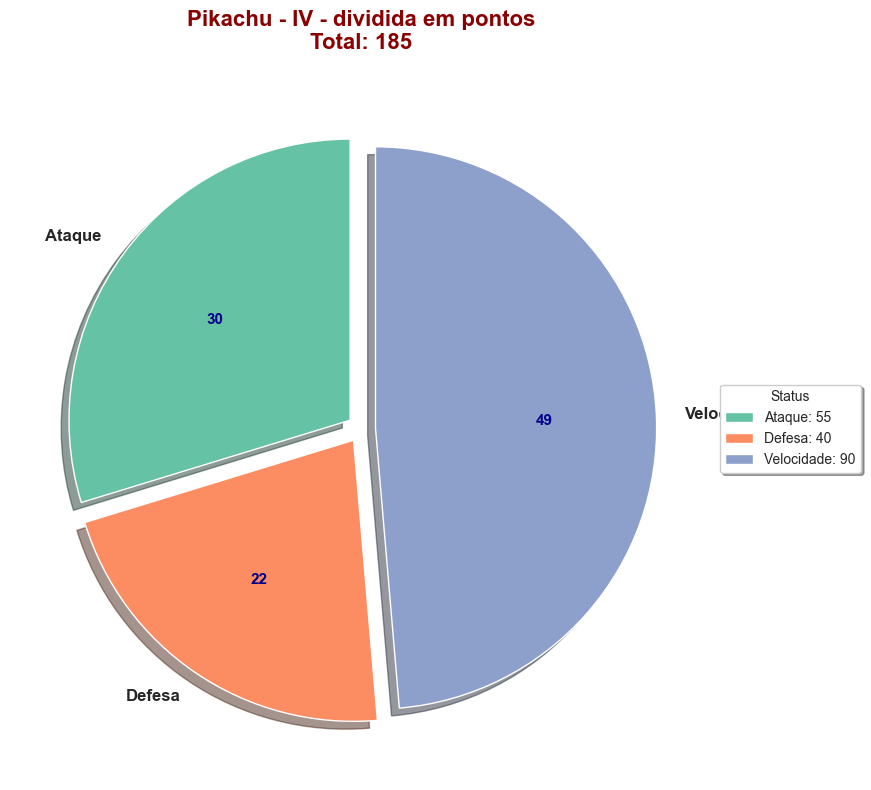

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load CSV
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

# Set Seaborn style for beautiful charts
sns.set_style("whitegrid")
sns.set_palette("Set2")

def plot_pokemon_stats(pokemon_name="Pikachu"):
    """
    Plot a beautiful pie chart showing attack, defense, speed stats for a Pokémon
    """
    # Find the Pokémon
    pokemon_data = dataFrame[dataFrame.iloc[:, 1].str.lower() == pokemon_name.lower()]
    
    if pokemon_data.empty:
        print(f"❌ {pokemon_name} not found!")
        return
    
    # Get the Pokémon data
    pokemon = pokemon_data.iloc[0]
    name = pokemon.iloc[1]  # Pokémon name
    
    # Get the stats from the correct columns
    attack = pokemon.iloc[14]   # Position 14: attack
    defense = pokemon.iloc[15]  # Position 15: defense
    speed = pokemon.iloc[18]    # Position 18: speed
    
    stats = [attack, defense, speed]
    labels = ['Ataque', 'Defesa', 'Velocidade']
    
    print(f"⚡ {name} Stats:")
    print(f"   Attack: {attack}")
    print(f"   Defense: {defense}")
    print(f"   Speed: {speed}")
    print(f"   Total: {sum(stats)}")
    
    # Create beautiful pie chart
    plt.figure(figsize=(10, 8))
    
    # Seaborn colors
    colors = sns.color_palette("Set2", 3)
    
    wedges, texts, autotexts = plt.pie(
        stats,
        labels=labels,
        colors=colors,
        autopct='%1.0f',
        startangle=90,
        explode=(0.05, 0.05, 0.05),  # Slightly separate slices
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )
    
    # Style the percentage text
    for autotext in autotexts:
        autotext.set_color('darkblue')
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')
    
    # Add title
    total_stats = sum(stats)
    plt.title(f"{name} - IV - dividida em pontos\nTotal: {total_stats}", 
              fontsize=16, fontweight='bold', pad=20, color='darkred')
    
    # Add legend
    legend_labels = [f"{label}: {value}" for label, value in zip(labels, stats)]
    plt.legend(wedges, legend_labels,
              title="Status",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),
              frameon=True,
              fancybox=True,
              shadow=True)
    
    plt.tight_layout()
    plt.show()

# Plot Pikachu stats
plot_pokemon_stats("Pikachu")

# You can also try other Pokémon:
# plot_pokemon_stats("Charizard")
# plot_pokemon_stats("Bulbasaur")
# plot_pokemon_stats("Squirtle")


Explicação do gráfico.....

#### Gráfico de Boxplot

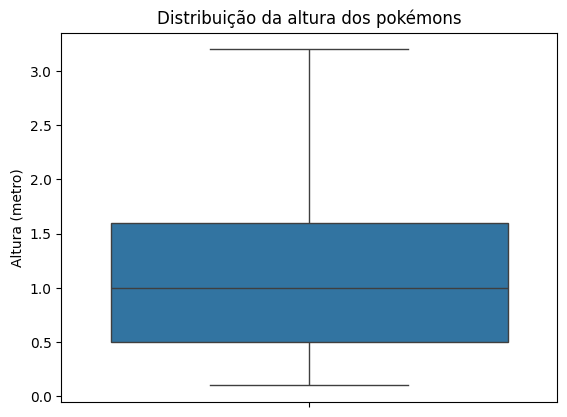

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

sns.boxplot(y=dataFrame["height"], showfliers=False) # showfliers=False esconde os outliers do gráfico

plt.title("Distribuição da altura dos pokémons")
plt.ylabel("Altura (metro)")
plt.show()


Esse gráfico de Boxplot demonstra que a maioria dos Pokémon tem altura entre 0,5 e 1,5 m, com maior variação para alturas mais altas.

- A **linha horizontal dentro da caixa azul** indica a **mediana** que é de aproximadamente 1 metro, dividindo o conjunto em duas metades. 
- A **caixa Azul representa os quartis:** 
- **o primeiro quartil (Q1):** em torno de 0,5 m, mostra que 25% dos Pokémon têm altura menor que este valor
- **o primeiro quartil (Q2):** é a mediana, que é de aproximadamente 1 metro, dividindo o conjunto em duas metades. 
- **terceiro quartil (Q3):** cerca de 1,5 m, indica que 75% têm altura menor que este valor. 
- **Os bigodes:** se estendem da caixa até os valores mínimo (+-0,1 m) e máximo (+-3,2 m) dentro do intervalo considerado normal, **mostrando a dispersão dos dados**.  
- **Os outliers** foram ocultados com o comando showfliers=False, ou seja, Pokémon com alturas extremamente baixas ou altas não aparecem no gráfico, mas ainda existem nos dados originais.

#### Gráfico de Regressão

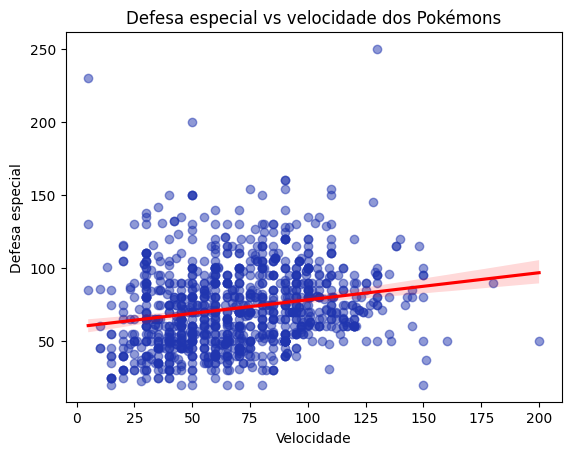

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv") 

sns.regplot( 
    y=dataFrame["special_defense"], 
    x=dataFrame["speed"], 
    scatter_kws={"alpha": 0.5, "color": "#2035AF"}, 
    line_kws={"color": "red"} 
) 

plt.title("Defesa especial vs velocidade dos Pokémons") 
plt.xlabel("Velocidade") 
plt.ylabel("Defesa especial") 
plt.show()

- No gráfico, **a linha vermelha mostra a tendência geral** entre Defesa especial e velocidade.
- A **tendência (relação)** entre a velocidade e defesa **é considerada fraca** porque os pontos azuis estão muito espalhados em torno da linha, sem formar um agrupamento próximo.
- A **linha vermelha indica que, em média, Pokémons mais rápidos tendem a ter defesa especial um pouco maior**, pois a inclinação da linha mostra esse crescimento gradual: quando a velocidade aumenta no eixo horizontal, a linha também sobe no eixo vertical, refletindo esse padrão médio.

#### Gráfico de Histograma

O código abaixo carrega os dados, plota um histograma da coluna speed com a curva de densidade e uma linha que indica a média.

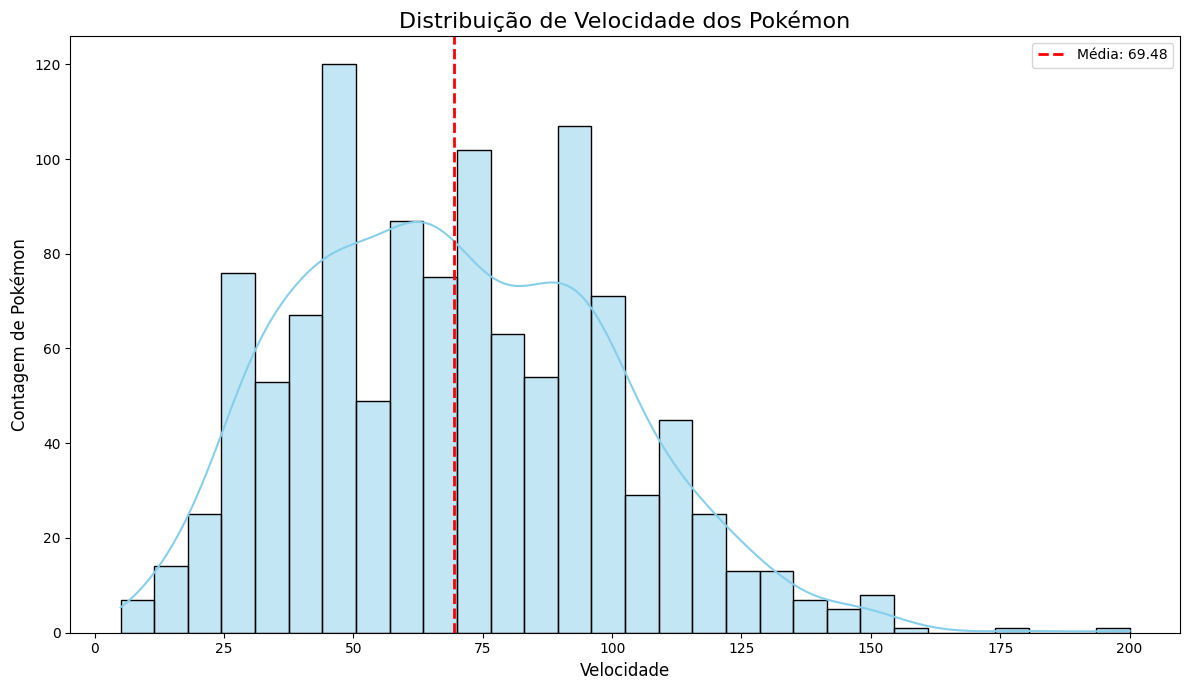

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

plt.figure(figsize=(12, 7))

# Calcula a velocidade média como referência
mean_speed = dataFrame['speed'].mean()

sns.histplot(data=dataFrame, x='speed', kde=True, bins=30, color='skyblue')

# Adiciona uma linha vertical
plt.axvline(mean_speed, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_speed:.2f}')

plt.title("Distribuição de Velocidade dos Pokémon", fontsize=16)
plt.xlabel("Velocidade", fontsize=12)
plt.ylabel("Contagem de Pokémon", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

Explicação do gráfEste histograma mostra, de forma bem direta, a distribuição do atributo de Velocidade (speed), revelando como os Pokémon se concentram em diferentes faixas de agilidade. Dessa maneira, o que chama a atenção é a grande concentração de Pokémon com velocidade moderada, situados principalmente entre 40 e 100 pontos, com um pico próximo da média de 76.56. Em contraste, a curva mostra uma "cauda" para a direita a qual indica um grupo de elite de Pokémon mais rápidos. 

O funcionamento do gráfico:

- O eixo horizontal (X) representa as faixas do atributo Velocidade.
- O eixo vertical (Y) mostra a contagem de quantos Pokémon existem em cada faixa.
- A **linha azul (curva de densidade)** suaviza as barras para mostrar a tendência geral da distribuição, enquanto a **linha vermelha** marca o ponto de velocidade média de todo o conjunto de dados.

#### Gráfico de Barras

##### Quantidade de Pokémon por Geração

O código abaixo carrega o arquivo CSV, conta quantos Pokémon existem em cada geração e depois plota o resultado em um gráfico de barras colorido.

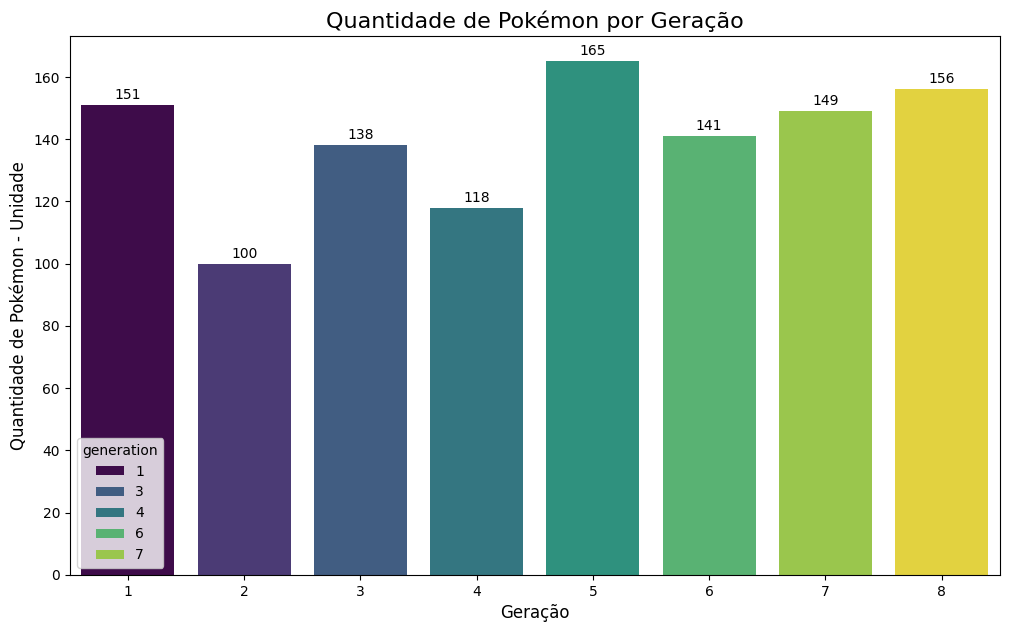

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

# Conta a quantidade de Pokémon
gen_counts = dataFrame['generation'].value_counts().sort_index()

plt.figure(figsize=(12, 7))

# O parâmetro 'hue' garante que cada barra tenha uma cor diferente
sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='viridis', hue=gen_counts.index, dodge=False)

for index, value in enumerate(gen_counts):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Quantidade de Pokémon por Geração", fontsize=16)
plt.xlabel("Geração", fontsize=12)
plt.ylabel("Quantidade de Pokémon - Unidade", fontsize=12)

plt.show()

Este gráfico de barras mostra, de forma bem direta, como a franquia Pokémon expandiu seu conteúdo ao longo das oito gerações, ou seja, representa quantos deles foram adicionados em cada uma das edições. Dessa forma, por exemplo, o que chama bastante atenção são os picos das gerações 1, no final dos anos 90, e da geração 5, entre 2010 e 2013. Em contraste, a Geração 6 (2013-2016) foi a que menos adicionou novas criaturas, época em que houve uma mudança de foco da quantidade de Pokémon para a introdução de novas Mega Evoluções.

O funcionamento do gráfico:

- O **eixo horizontal (X)** categoriza cada uma das 8 gerações.
- O **eixo vertical (Y)** mede a contagem total de Pokémon por geração.

##### Tipos de Pokémon

O código a seguir carrega os dados, conta a frequência de cada tipo primário (type_1), converte essa contagem em porcentagem e, finalmente, plota o resultado em um gráfico de barras horizontal ordenado, do tipo mais comum para o menos comum.

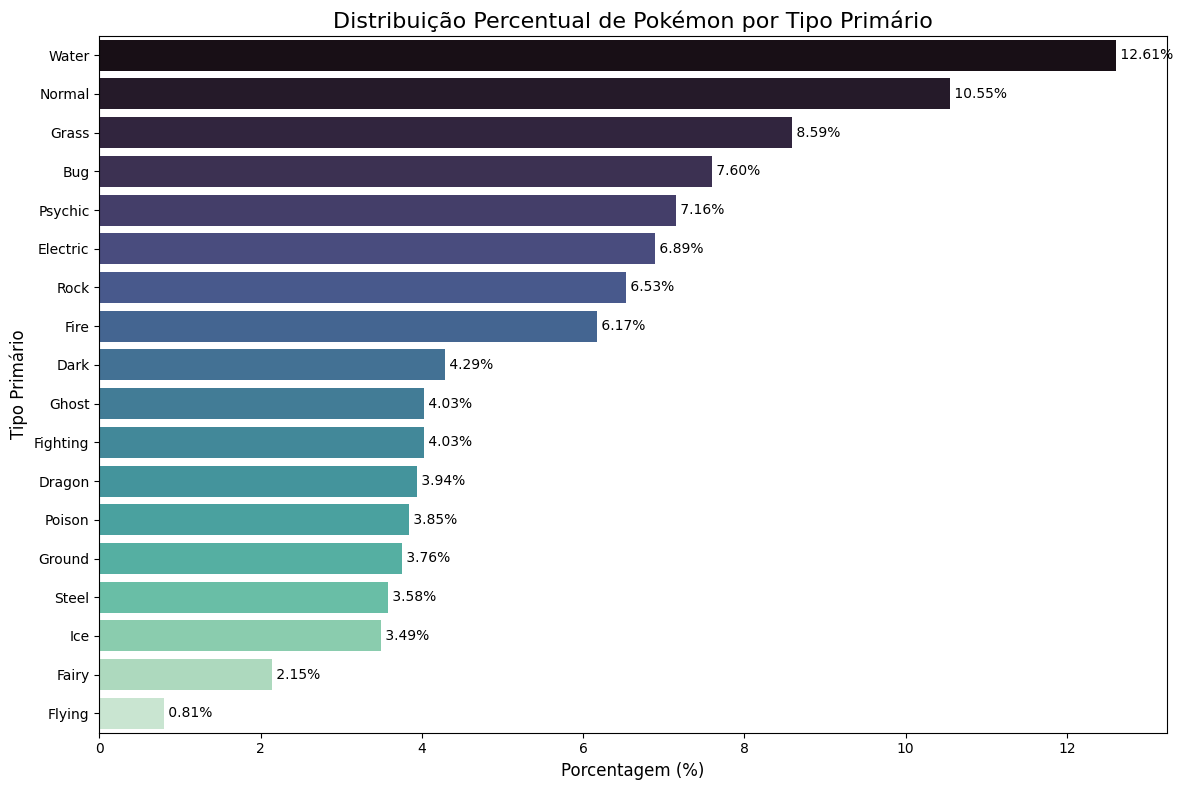

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataFrame = pd.read_csv("Complete_Pokedex_V1.1.csv")

# Contar a frequência de cada tipo na coluna 'type_1'
type_counts = dataFrame['type_1'].value_counts()

total_pokemon = len(dataFrame)
type_percentages = (type_counts / total_pokemon) * 100

plt.figure(figsize=(12, 8))

sns.barplot(x=type_percentages.values, y=type_percentages.index, palette='mako', hue=type_percentages.index, dodge=False)

plt.title("Distribuição Percentual de Pokémon por Tipo Primário", fontsize=16)
plt.xlabel("Porcentagem (%)", fontsize=12)
plt.ylabel("Tipo Primário", fontsize=12)

for index, value in enumerate(type_percentages):
    plt.text(value, index, f' {value:.2f}%', va='center')

plt.tight_layout()
plt.show()

Este gráfico de barras horizontais mostra algo que parece só uma curiosidade, mas na real é uma regra de design super importante dentro do universo Pokémon: a forma como os tipos elementares são distribuídos. Dessa forma, é observado a predominância do tipo *Água (Water)*, que representa mais de 11% de todas as criaturas, seguido pelos tipos Normal e *Grama (Grass)*, o que consolida os elementos básicos como os mais comuns. Em contraste, é observado também que o tipo *Voador (Flying)* aparece como o menos frequente entre os tipos primários.

O funcionamento do gráfico é:
 - O **eixo vertical (Y)** categoriza cada um dos 18 tipos primários, ordenando-os do mais ao menos comum.
 - O **eixo horizontal (X)** mede a participação percentual de cada tipo no total de Pokémon.